In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Some of this code should look familiar, but let's break it down:

# We create a cities list to store city names.
# We iterate through the coordinates, as in our practice, and retrieve the nearest city
# using the latitude and longitude pair.
# We add a decision statement with the logical operator not in to determine whether the found city
# is already in the cities list. If not, then we'll use the append() function to add it. 
# We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, 
# which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

In [7]:
# import requests library
import requests

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | zhigansk
Processing Record 3 of Set 1 | tautira
Processing Record 4 of Set 1 | henties bay
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | vilyuysk
Processing Record 9 of Set 1 | saint-pierre
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | batticaloa
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | busselton
Processing Recor

Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | vao
Processing Record 42 of Set 4 | mattru
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | goalpara
Processing Record 46 of Set 4 | bethel
Processing Record 47 of Set 4 | upernavik
Processing Record 48 of Set 4 | rock sound
Processing Record 49 of Set 4 | nanortalik
Processing Record 50 of Set 4 | gopalpur
Processing Record 1 of Set 5 | sijunjung
Processing Record 2 of Set 5 | two hills
Processing Record 3 of Set 5 | bronnoysund
Processing Record 4 of Set 5 | ituiutaba
Processing Record 5 of Set 5 | celestun
Processing Record 6 of Set 5 | killybegs
Processing Record 7 of Set 5 | teya
Processing Record 8 of Set 5 | turukhansk
Processing Record 9 of Set 5 | saint-augustin
Processing Record 10 of Set 5 | guarda
Processing Record 11 of Set 5 | muli
Processing Record 12 of Set 5 | kavaratti
Processing Record 13 of Set 5 | ll

Processing Record 30 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 31 of Set 8 | varhaug
Processing Record 32 of Set 8 | margate
Processing Record 33 of Set 8 | neiafu
Processing Record 34 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 35 of Set 8 | karasburg
Processing Record 36 of Set 8 | vieques
Processing Record 37 of Set 8 | sarangani
Processing Record 38 of Set 8 | hay river
Processing Record 39 of Set 8 | bathsheba
Processing Record 40 of Set 8 | geraldton
Processing Record 41 of Set 8 | bay roberts
Processing Record 42 of Set 8 | nagapattinam
Processing Record 43 of Set 8 | xining
Processing Record 44 of Set 8 | kavieng
Processing Record 45 of Set 8 | kieta
Processing Record 46 of Set 8 | halalo
City not found. Skipping...
Processing Record 47 of Set 8 | klaksvik
Processing Record 48 of Set 8 | brande
Processing Record 49 of Set 8 | satitoa
City not found. Skipping...
Processing Record 50 of Set 8 | kholodnyy
Processing Record 1 o

City not found. Skipping...
Processing Record 20 of Set 12 | la ronge
Processing Record 21 of Set 12 | touros
Processing Record 22 of Set 12 | iglesias
Processing Record 23 of Set 12 | paraisopolis
Processing Record 24 of Set 12 | amontada
Processing Record 25 of Set 12 | hervey bay
Processing Record 26 of Set 12 | yangjiang
Processing Record 27 of Set 12 | inhambane
Processing Record 28 of Set 12 | najran
Processing Record 29 of Set 12 | utiroa
City not found. Skipping...
Processing Record 30 of Set 12 | dangriga
Processing Record 31 of Set 12 | nelson bay
Processing Record 32 of Set 12 | sola
Processing Record 33 of Set 12 | san quintin
Processing Record 34 of Set 12 | ugoofaaru
Processing Record 35 of Set 12 | fort nelson
Processing Record 36 of Set 12 | saint-marc
Processing Record 37 of Set 12 | slonim
Processing Record 38 of Set 12 | teeli
Processing Record 39 of Set 12 | mixtepec
City not found. Skipping...
Processing Record 40 of Set 12 | craig
Processing Record 41 of Set 12 | 

In [12]:
# Let's break down the code so we understand fully before continuing:

# We create the for loop with the enumerate() method and reference the index and the city in the list.
# In the conditional statement (inside the for loop??), we check if the remainder of the index divided 
# by 50 is equal to 0 and if 
# the index is greater than or equal to 50. If the statement is true, then the set_count and the record_count 
# are incremented by 1.
# Inside the conditional statement (inside the for loop??), we create the URL endpoint for each city, as before. 
# However, we are removing 
# the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will find 
# the corresponding weather data for the city instead of finding the weather data for the first part of the city name.

# ^^^KNOWING THE NEED TO DO THIS SOUNDS LIKE A RESULT OF READING DOCUMENTATION^^^ (OR EXPERIENCING ERRORS ON WHITESPACE CITIES)

# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
# Then we add one to the record count before the next city is processed.
# Next, we will retrieve the data from the JSON weather response for each city.


# Let's review the code:

# We parse the JSON file for the current city.
# If there is no weather data for the city, i.e., a <Response [404]> then there is no weather to retrieve 
# and City not found. Skipping... is printed.
# If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, 
# cloudiness, wind speed, and date and assign those values to variables.
# We could write a try-except block for each one of these parameters to handle the KeyError if the data 
# wasn't found, but since these parameters are always present in the response this won't be necessary.
# We append the cities list with a dictionary for that city, where the key-value pairs are the values 
# from our weather parameters.
# Finally, below the try block and after the except block, we add the closing print statement, which will 
# let us know the data retrieval has been completed. Make sure that your except block is indented and in line 
# with the try block, and that the print statements are flush with the margin.
# Under the print statement in the except block, we add the pass statement, which is a general purpose 
# statement to handle all errors encountered and to allow the program to continue.

In [14]:
len(city_data)

562

In [16]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,83.62,74,100,15.19,MV,2022-07-14 16:00:54
1,Zhigansk,66.7697,123.3711,58.95,98,88,8.57,RU,2022-07-14 16:03:23
2,Tautira,-17.7333,-149.1500,75.70,62,97,21.23,PF,2022-07-14 16:01:21
3,Henties Bay,-22.1160,14.2845,61.09,71,0,9.19,NA,2022-07-14 16:03:23
4,Vila Velha,-20.3297,-40.2925,75.15,85,75,3.44,BR,2022-07-14 16:03:24
5,Rikitea,-23.1203,-134.9692,65.77,88,100,6.62,PF,2022-07-14 16:03:24
6,Vilyuysk,63.7553,121.6247,60.73,97,24,4.21,RU,2022-07-14 16:03:24
7,Saint-Pierre,-21.3393,55.4781,71.28,76,75,5.75,RE,2022-07-14 16:00:05
8,Talnakh,69.4865,88.3972,58.21,63,100,3.42,RU,2022-07-14 15:59:02
9,Faanui,-16.4833,-151.7500,77.36,74,45,25.05,PF,2022-07-14 16:01:54


In [17]:
col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2022-07-14 16:00:54,-0.6000,73.0833,83.62,74,100,15.19
1,Zhigansk,RU,2022-07-14 16:03:23,66.7697,123.3711,58.95,98,88,8.57
2,Tautira,PF,2022-07-14 16:01:21,-17.7333,-149.1500,75.70,62,97,21.23
3,Henties Bay,NA,2022-07-14 16:03:23,-22.1160,14.2845,61.09,71,0,9.19
4,Vila Velha,BR,2022-07-14 16:03:24,-20.3297,-40.2925,75.15,85,75,3.44
5,Rikitea,PF,2022-07-14 16:03:24,-23.1203,-134.9692,65.77,88,100,6.62
6,Vilyuysk,RU,2022-07-14 16:03:24,63.7553,121.6247,60.73,97,24,4.21
7,Saint-Pierre,RE,2022-07-14 16:00:05,-21.3393,55.4781,71.28,76,75,5.75
8,Talnakh,RU,2022-07-14 15:59:02,69.4865,88.3972,58.21,63,100,3.42
9,Faanui,PF,2022-07-14 16:01:54,-16.4833,-151.7500,77.36,74,45,25.05


In [18]:
#Create the output csv file
output_data_file = "weather_data/cities.csv"

#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

# The last line in the code block will export the DataFrame to a CSV file, with the index label 
# (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame, 
# that header will be present in the DataFrame.

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

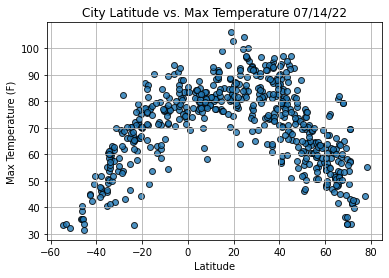

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

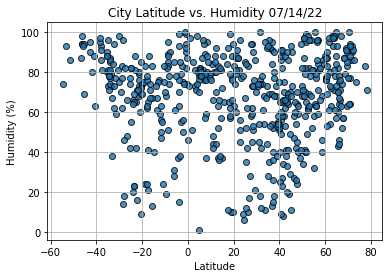

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

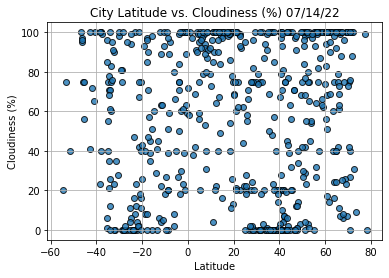

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

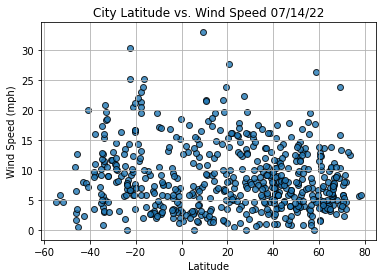

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()